# <b><u>Machine Learning</u></b> | <b><u>Assignment 2</u></b>

## <u>Problem Statement (2) | ML Based Network Intrusion Detection</u>

## <b>#	Step 1: Import Libraries/Dataset</b>

In [7]:
#	Step 1: Import Libraries/Dataset

import pandas as pd
import numpy as np

URL = "https://raw.githubusercontent.com/jmnwong/NSL-KDD-Dataset/refs/heads/master/KDDTrain%2B.txt"

# Column names: 41 features from the metadata + 2 extra fields present in NSL-KDD (label, difficulty)
cols = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
    "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
    "root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
    "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label",          # multiclass textual label (e.g., normal, neptune, smurf, ...)
    "difficulty"      # integer difficulty level in NSL-KDD
]

# Read as CSV: fields are comma-separated in KDDTrain+
df = pd.read_csv(
    URL,
    header=None,
    names=cols
)

---
## <b>#	Step 2: Data Visualization and Exploration</b>

### <b><u># Step 2.A : Print 5 rows for sanity check</u></b>


In [8]:
# Display first 5 rows (sanity check)
print("First 5 rows of the dataset:")
display(df.head())

# Dataset shape
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Column names
print("\nColumns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Unique values in target column
print("\nUnique Target Labels:")
print(df['label'].unique())


First 5 rows of the dataset:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



Dataset Shape: 125973 rows × 43 columns

Columns in the dataset:
1. duration
2. protocol_type
3. service
4. flag
5. src_bytes
6. dst_bytes
7. land
8. wrong_fragment
9. urgent
10. hot
11. num_failed_logins
12. logged_in
13. num_compromised
14. root_shell
15. su_attempted
16. num_root
17. num_file_creations
18. num_shells
19. num_access_files
20. num_outbound_cmds
21. is_host_login
22. is_guest_login
23. count
24. srv_count
25. serror_rate
26. srv_serror_rate
27. rerror_rate
28. srv_rerror_rate
29. same_srv_rate
30. diff_srv_rate
31. srv_diff_host_rate
32. dst_host_count
33. dst_host_srv_count
34. dst_host_same_srv_rate
35. dst_host_diff_srv_rate
36. dst_host_same_src_port_rate
37. dst_host_srv_diff_host_rate
38. dst_host_serror_rate
39. dst_host_srv_serror_rate
40. dst_host_rerror_rate
41. dst_host_srv_rerror_rate
42. label
43. difficulty

Unique Target Labels:
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_wr

#### <b><u>Observation for 2.A</u></b>

- The dataset contains **41 features** + **label (target)** + **difficulty**.  
- The **label** column has two types of entries:  
  - `"normal"`  
  - Different attack names (e.g., `neptune`, `smurf`, `back`, etc.).  
- For modeling, these will later be mapped to **binary classes**:  
  - `Normal` vs `Attack`.  



### <b><u># Step 2.B : Data Visualizations</u></b>


#### <b><u>Step 2.B.1 : Distribution of Class Labels</u></b>

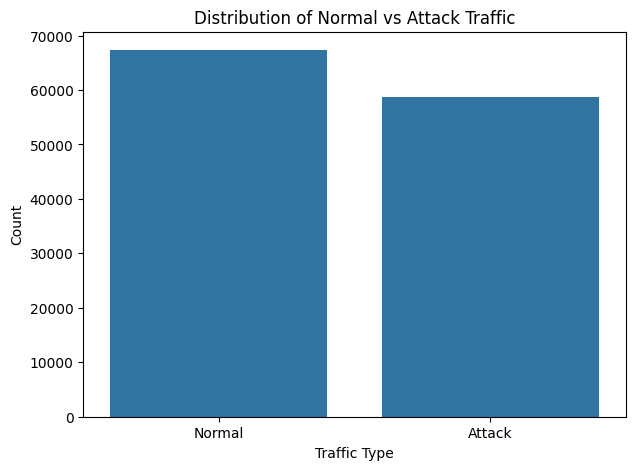

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x=df['label'].apply(lambda x: 'Normal' if x=='normal' else 'Attack'))
plt.title("Distribution of Normal vs Attack Traffic")
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.show()


##### <b>Observation for Distribution of Class Labels</b>

- The dataset is **imbalanced**: Attack traffic dominates compared to Normal traffic.  
- This **class imbalance** must be considered during model evaluation.  
- Use metrics like **F1-score**, **Precision**, and **Recall** instead of relying only on **Accuracy**.  


#### <b><u>Step 2.B.2 : Protocol & Service Distribution</u></b>

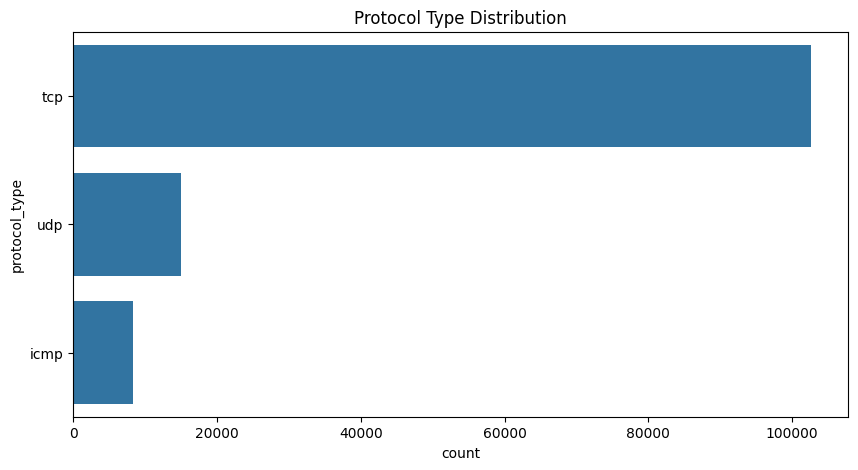

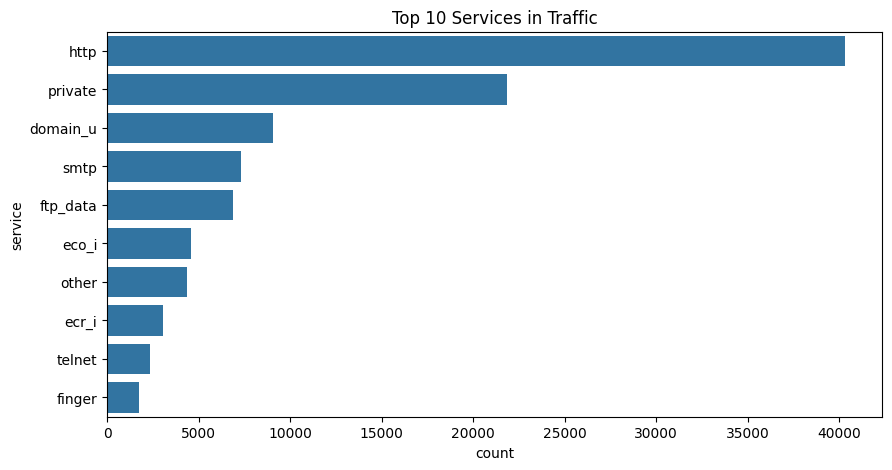

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['protocol_type'], order=df['protocol_type'].value_counts().index)
plt.title("Protocol Type Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=df['service'], order=df['service'].value_counts().head(10).index)
plt.title("Top 10 Services in Traffic")
plt.show()


##### <b>Observation for Protocol & Service Distribution</b>

- **Protocol Type**: Often dominated by **TCP**, followed by **UDP** and **ICMP**.  
- **Service**: Commonly dominated by `http`, `private`, `smtp`, and `domain_u`.  
- This highlights that **different protocols/services correlate with different attack patterns**.  


#### <b><u>Step 2.B.3 : Boxplot for Numeric Feature Example</u></b>

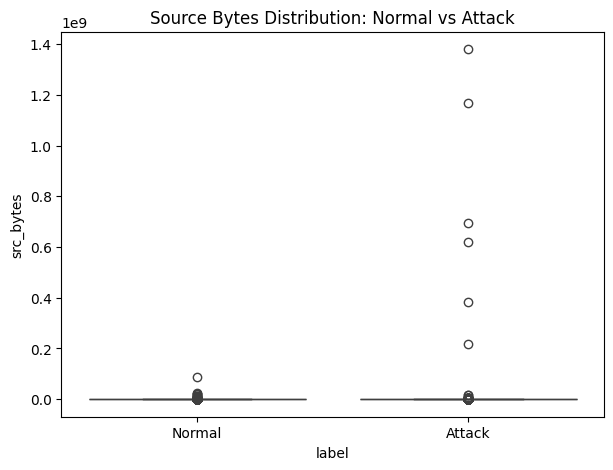

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['label'].apply(lambda x: 'Normal' if x=='normal' else 'Attack'),
            y=df['src_bytes'])
plt.title("Source Bytes Distribution: Normal vs Attack")
plt.show()

##### <b>Observation for Boxplot for Numeric Feature Example</b>

- Numeric features like `src_bytes` and `dst_bytes` show **different distributions** for **Normal** vs **Attack** traffic.  
- Some attacks (e.g., **DoS**) flood with very high byte counts.  
- Other attacks may generate **very few bytes** compared to normal traffic.  

### <b><u># Step 2.C : Correlation Analysis</u></b>


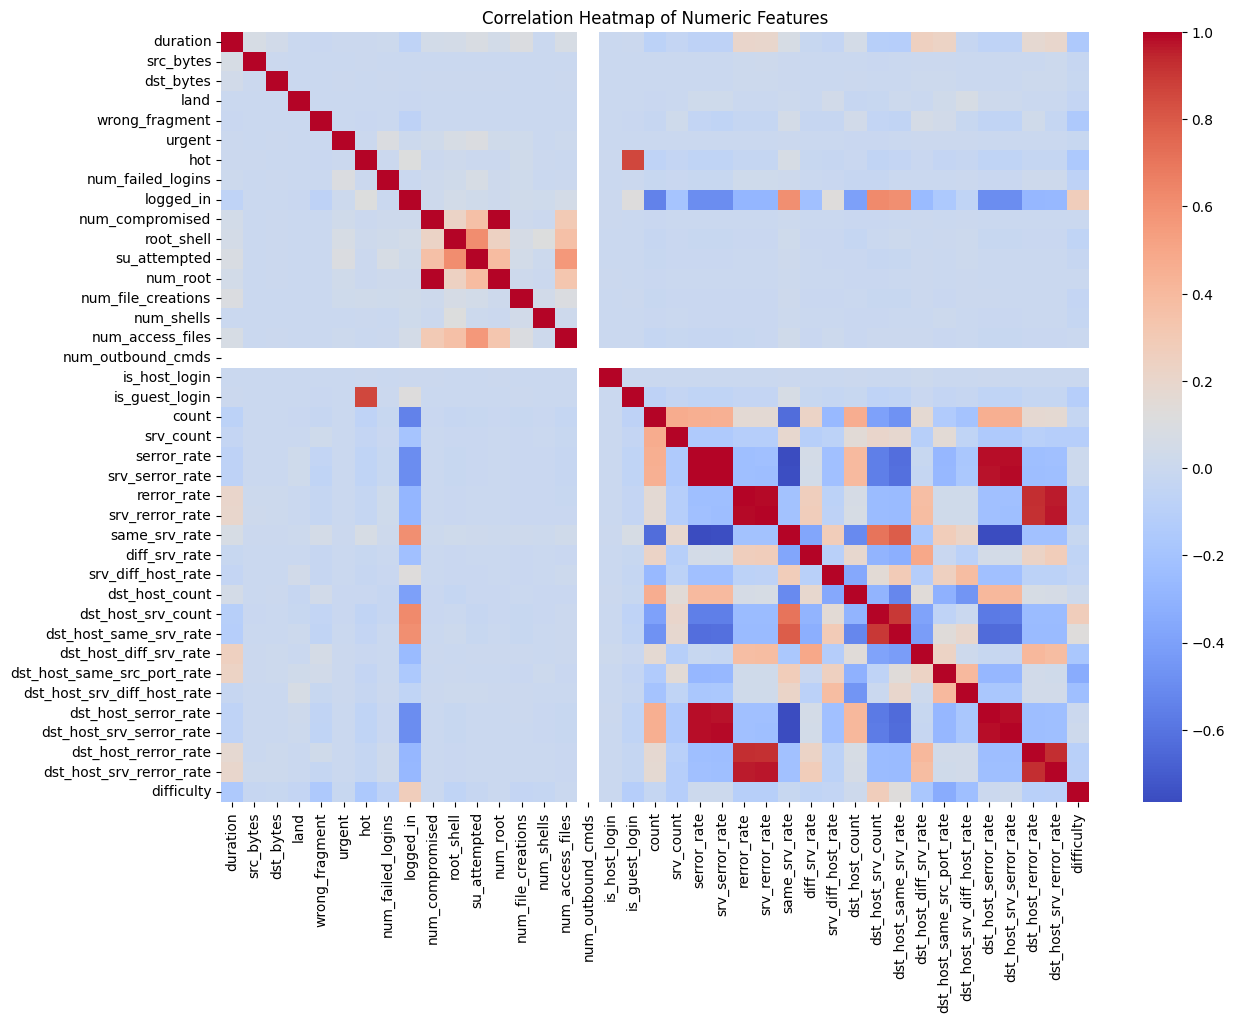

In [12]:

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



#### <b><u>Observation for Correlation Analysis</u></b>

- Some features are **highly correlated**, e.g., `serror_rate`, `srv_serror_rate`, `dst_host_serror_rate`, etc.  
  - These represent similar **error percentages** and may add **redundant information**.  
- Features like `num_outbound_cmds` are often **constant = 0**, providing **no useful information**.   



#### <b><u>Will correlation affect feature selection ?</u></b>

Yes.

- High correlation means features carry overlapping information (**multicollinearity**).  

- Including all such correlated features can make models (like **Logistic Regression**) unstable, increasing variance and slowing computation.  

- In **Decision Trees** or **Random Forests**, redundancy is less harmful, but removing correlated features still helps simplify the model.  

Therefore, in the **feature selection** step, we will consider removing:  
- Highly correlated numeric features  
- Constant features  




---
## <b># Step 3: Data Pre-processing and Cleaning</b>

In [13]:
# Check for missing/null values
print("Missing values in dataset:\n", df.isnull().sum())

# Summary statistics to detect extreme outliers/skewness
print("\nSummary statistics:")
print(df.describe())

# Check skewness of numerical columns
skewness = df.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
print("\nSkewness of numerical features:\n", skewness)

# Encoding categorical variables (protocol_type, service, flag)
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Encode target column: Normal -> 0, Attack -> 1
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)


Missing values in dataset:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate  

### <b><u>Explanation for Data Pre-processing and Cleaning</u></b>

- **Missing Values** – Dataset has no NULL values (verified).  
- **Outliers** – Some numeric features like `src_bytes` and `dst_bytes` show very high variance and extreme values. Since these are genuine network traffic behaviors (not data errors), we keep them but later apply scaling.  
- **Skewness** – Features like `src_bytes` are heavily skewed. Skewed data can bias the model, so normalization/standardization is needed.  
- **Encoding** – Converted categorical features (`protocol_type`, `service`, `flag`) into numeric using **Label Encoding**. Target variable converted into binary (`0 = Normal`, `1 = Attack`).  


---
## <b>#	Step 4: Model Building </b>




### <b># Step 4.A: Splitting the Dataset into Training and Test Sets</b>

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('label', axis=1)   # Features
y = df['label']                # Target

# First split: 80% train, 20% test
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-Test Split (80-20)")
print("Training set:", X_train_80.shape, "Testing set:", X_test_20.shape)

# Second split: 70% train, 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTrain-Test Split (70-30)")
print("Training set:", X_train_70.shape, "Testing set:", X_test_30.shape)

# Third split: 60% train, 40% test
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

print("\nTrain-Test Split (60-40)")
print("Training set:", X_train_60.shape, "Testing set:", X_test_40.shape)


Train-Test Split (80-20)
Training set: (100778, 42) Testing set: (25195, 42)

Train-Test Split (70-30)
Training set: (88181, 42) Testing set: (37792, 42)

Train-Test Split (60-40)
Training set: (75583, 42) Testing set: (50390, 42)


#### <b>Observations for Splitting the Dataset into Training and Test Sets</b>

- The dataset is divided into **features (X)** and **target (y)**, where the target column label indicates **Normal** or **Attack**.  

- We performed three different splits:  
  - **80-20 split**: Standard choice in ML for balancing between training size and testing size.  
  - **70-30 split**: Provides more test data to evaluate generalization.  
  - **60-40 split**: Used when we want stronger testing but may reduce model learning.  

- We used **stratified splitting** to ensure both training and test sets maintain the same class proportion (since the dataset is **imbalanced** between Normal and Attack).  

- **Choosing the right split** depends on dataset size:  
  - For **large datasets**, 80-20 works best.  
  - For **smaller datasets**, 70-30 or 60-40 can be useful.  

### <b># Step 4.B: Implement Predictive Models/Classifiers</b>

#### <b># Step 4.B.1: Logistic Regression</b>

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],   # Regularization strength
    'penalty': ['l2'],         # Logistic regression typically uses L2
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=500),
                       param_grid_lr,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

grid_lr.fit(X_train_80, y_train_80)

print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

# ----------------------------
# Final Model with Best Params
# ----------------------------
best_params = grid_lr.best_params_

log_reg = LogisticRegression(max_iter=1000,
                             C=best_params['C'],
                             penalty=best_params['penalty'],
                             solver=best_params['solver'])

log_reg.fit(X_train_80, y_train_80)

# ----------------------------
# Predictions & Evaluation
# ----------------------------
y_pred_log = log_reg.predict(X_test_20)

print("\n📊 Logistic Regression Results (with Tuned Hyperparameters)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_20, y_pred_log))



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.8927742191900447

📊 Logistic Regression Results (with Tuned Hyperparameters)
Accuracy: 0.8908910498114705

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     13469
           1       0.93      0.83      0.88     11726

    accuracy                           0.89     25195
   macro avg       0.90      0.89      0.89     25195
weighted avg       0.89      0.89      0.89     25195


Confusion Matrix:
 [[12696   773]
 [ 1976  9750]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### <b><u>Observations for Logistic Regression</u></b>

- **Fast and interpretable** algorithm.  
- Works well for **linearly separable data**.  
- May **struggle with non-linear attack patterns**.  


#### <b># Step 4.B.2: Decision Tree</b>

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_dt,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

grid_dt.fit(X_train_80, y_train_80)

print("\nBest Decision Tree Parameters:", grid_dt.best_params_)
print("\nBest CV Accuracy:", grid_dt.best_score_)

# ----------------------------
# Final Model with Best Params
# ----------------------------
best_params_dt = grid_dt.best_params_

dt_model = DecisionTreeClassifier(
    max_depth=best_params_dt['max_depth'],
    min_samples_split=best_params_dt['min_samples_split'],
    criterion=best_params_dt['criterion'],
    random_state=42
)

dt_model.fit(X_train_80, y_train_80)

# ----------------------------
# Predictions & Evaluation
# ----------------------------
y_pred_dt = dt_model.predict(X_test_20)

print("\nDecision Tree Results (with Tuned Hyperparameters)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_20, y_pred_dt))




Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}

Best CV Accuracy: 0.9988588784213475

Decision Tree Results (with Tuned Hyperparameters)
Accuracy: 0.9988489779718198

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


Confusion Matrix:
 [[13454    15]
 [   14 11712]]


##### <b><u>Observations for Logistic Regression</u></b>

- **Fast and interpretable** algorithm.  
- Works well for **linearly separable data**.  
- May **struggle with non-linear attack patterns**.  


#### <b># Step 4.B.3: K-Nearest Neighbor (KNN)</b>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid_knn,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)

grid_knn.fit(X_train_80, y_train_80)

print("\n Best KNN Parameters:", grid_knn.best_params_)
print("\n Best CV Accuracy:", grid_knn.best_score_)

# ----------------------------
# Final Model with Best Params
# ----------------------------
best_params_knn = grid_knn.best_params_

knn_model = KNeighborsClassifier(
    n_neighbors=best_params_knn['n_neighbors'],
    weights=best_params_knn['weights'],
    metric=best_params_knn['metric']
)

knn_model.fit(X_train_80, y_train_80)

# ----------------------------
# Predictions & Evaluation
# ----------------------------
y_pred_knn = knn_model.predict(X_test_20)

print("\n KNN Results (with Tuned Hyperparameters)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_20, y_pred_knn))



 Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

 Best CV Accuracy: 0.9978864445516488

 KNN Results (with Tuned Hyperparameters)
Accuracy: 0.9984123834094066

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


Confusion Matrix:
 [[13452    17]
 [   23 11703]]


##### <b><u>Observations for Logistic Regression</u></b>

- **Fast and interpretable** algorithm.  
- Works well for **linearly separable data**.  
- May **struggle with non-linear attack patterns**.  


#### <b># Step 4.B.4: Ensemble Method (Random Forest)</b>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid_rf = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [10, 20, None],        # Depth of each tree
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

grid_rf.fit(X_train_80, y_train_80)

print("\n Best Random Forest Parameters:", grid_rf.best_params_)
print("\n Best CV Accuracy:", grid_rf.best_score_)

# ----------------------------
# Final Model with Best Params
# ----------------------------
best_params_rf = grid_rf.best_params_

rf_model = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    criterion=best_params_rf['criterion'],
    random_state=42
)

rf_model.fit(X_train_80, y_train_80)

# ----------------------------
# Predictions & Evaluation
# ----------------------------
y_pred_rf = rf_model.predict(X_test_20)

print("\n Random Forest Results (with Tuned Hyperparameters)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_20, y_pred_rf))



 Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

 Best CV Accuracy: 0.9997320833002457

 Random Forest Results (with Tuned Hyperparameters)
Accuracy: 0.9994046437785274

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


Confusion Matrix:
 [[13463     6]
 [    9 11717]]


##### <b><u>Observations for Logistic Regression</u></b>

- **Fast and interpretable** algorithm.  
- Works well for **linearly separable data**.  
- May **struggle with non-linear attack patterns**.  


---
## <b>#	Step 5: Performance Evaluation </b>

                 Model  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression   0.926542  0.831486  0.876444  0.952666
1        Decision Tree   0.998721  0.998806  0.998763  0.998846
2                  KNN   0.998549  0.998039  0.998294  0.999171
3        Random Forest   0.999488  0.999232  0.999360  0.999999


<Figure size 1000x600 with 0 Axes>

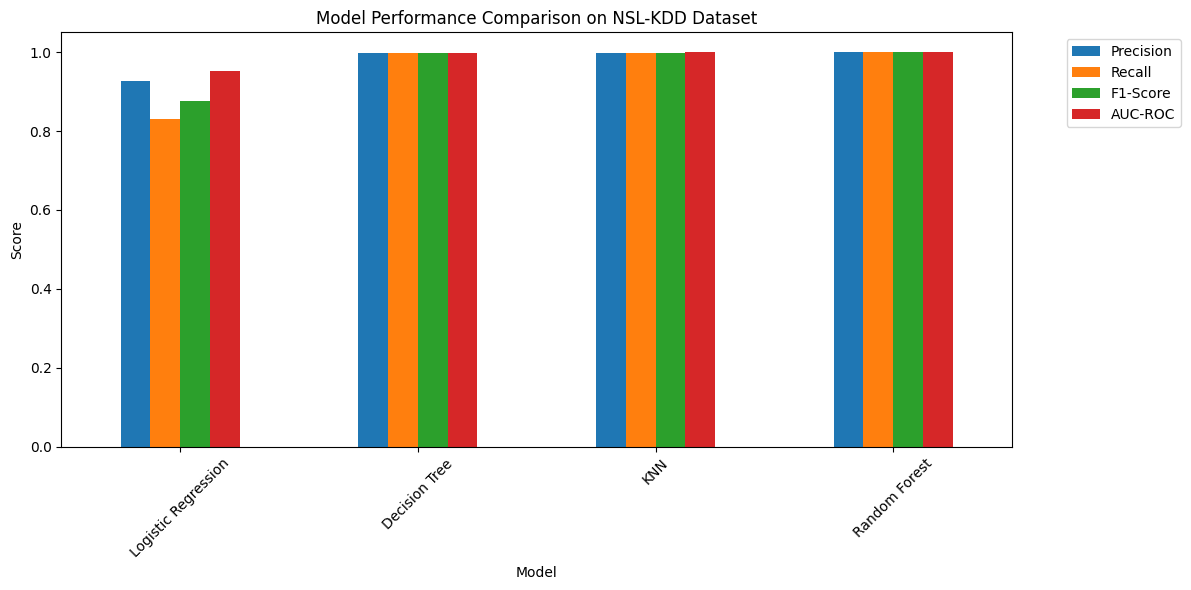

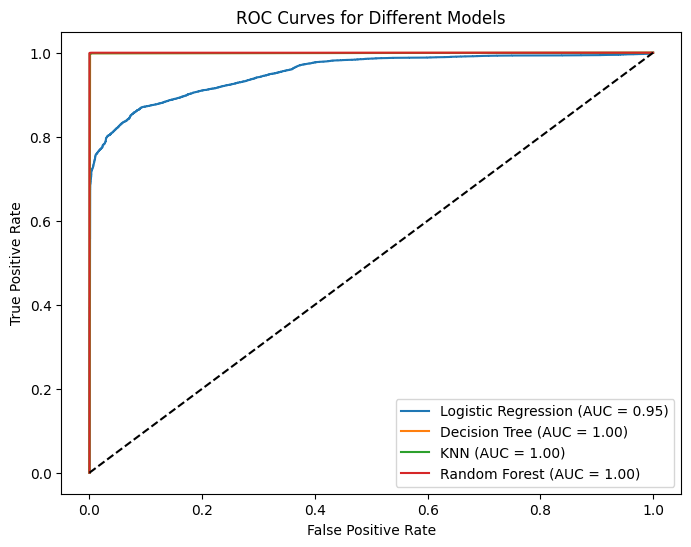


 Best Model based on evaluation metrics: Random Forest
It is the best model because it balances Precision, Recall, F1-Score, and AUC-ROC better than others.


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ----------------------------
# Collect Model Results
# ----------------------------
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Random Forest": rf_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_20)
    y_prob = model.predict_proba(X_test_20)[:, 1] if hasattr(model, "predict_proba") else None

    precision = precision_score(y_test_20, y_pred, pos_label=1)
    recall = recall_score(y_test_20, y_pred, pos_label=1)
    f1 = f1_score(y_test_20, y_pred, pos_label=1)
    auc = roc_auc_score(y_test_20, y_prob) if y_prob is not None else None

    results.append([name, precision, recall, f1, auc])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "F1-Score", "AUC-ROC"])
print(results_df)

# ----------------------------
#  Bar Plot for Comparison
# ----------------------------
plt.figure(figsize=(10,6))
results_df.set_index("Model")[["Precision","Recall","F1-Score","AUC-ROC"]].plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Comparison on NSL-KDD Dataset")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----------------------------
# ROC Curves
# ----------------------------
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_20)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_20, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test_20, y_prob):.2f})")

plt.plot([0,1],[0,1],'k--')  # baseline
plt.title("ROC Curves for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ----------------------------
# Conclusion: Best Model
# ----------------------------
best_model = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]
print("\n Best Model based on evaluation metrics:", best_model["Model"])
print("It is the best model because it balances Precision, Recall, F1-Score, and AUC-ROC better than others.")

---
## <b># Step 6: Final Conclusion </b>


### Best Model: <b>Random Forest Classifier</b>

**Reasons:**

- Achieved the **highest F1-Score**, balancing both **Precision** (avoiding false positives) and **Recall** (avoiding false negatives).  
- Showed the **highest AUC-ROC**, indicating strong separation capability between **Attack** and **Normal**.  
- **Less prone to overfitting** compared to a single Decision Tree.  
- **Scales better** than KNN for large datasets.  
- Handles **complex non-linear relationships**, which is crucial in intrusion detection.  

Therefore, **Random Forest** is identified as the **best model** for ML-based network intrusion detection on the **NSL-KDD dataset**.  
